# 트리의 앙상블

## **주요 개념 정리**
#### **정형 data VS 비정형 data**
- 정형 data : csv, database, excel에 저장하기 쉬움
- 비정형 data : 글, 사진, 음악.. -> NoSQL database는 excel이나 csv에 담기 어려운 text, json data를 저장하는데, 용이하다.
- 지금까지 학습한 머신러닝 알고리즘은 정형 data에 잘 맞음
- 특히 **정형 data를 다루는 데 가장 뛰어난 알고리즘 : 앙상블 학습**
- 비정형 data는 규칙성을 찾기 어려움 => 신경망 알고리즘을 사용해 학습

#### **앙상블 학습 ensemble learning**
- decision tree를 기반으로 만들어진 알고리즘
- 여러 개의 결정 트리(Decision Tree)를 결합하여 하나의 결정 트리보다 더 좋은 성능을 내는 머신러닝 기법
-  여러 개의 약 분류기 (Weak Classifier)를 결합하여 강 분류기(Strong Classifier)를 만드는 것

### **배깅(Bagging) & 부스팅(Boosting)**
**배깅(Bagging)**
- Bootstrap Aggregation의 약자
- 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법

> 우선, 데이터로부터 부트스트랩을 합니다. (복원 랜덤 샘플링) 부트스트랩한 데이터로 모델을 학습시킵니다. 그리고 학습된 모델의 결과를 집계하여 최종 결과 값을 구합니다.

> Categorical Data는 투표 방식(Votinig)으로 결과를 집계하며, Continuous Data는 평균으로 집계합니다.

> Categorical Data일 때, 투표 방식으로 한다는 것은 전체 모델에서 예측한 값 중 가장 많은 값을 최종 예측값으로 선정한다는 것입니다. 6개의 결정 트리 모델이 있다고 합시다. 4개는 A로 예측했고, 2개는 B로 예측했다면 투표에 의해 4개의 모델이 선택한 A를 최종 결과로 예측한다는 것입니다.

> Continuous Data일 때, 평균으로 집계한다는 것은 말 그대로 각각의 결정 트리 모델이 예측한 값에 평균을 취해 최종 Bagging Model의 예측값을 결정한다는 것입니다.

**부스팅(Boosting)**

> 부스팅은 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법입니다. 배깅은 Deicison Tree1과 Decision Tree2가 서로 독립적으로 결과를 예측합니다. 여러 개의 독립적인 결정 트리가 각각 값을 예측한 뒤, 그 결과 값을 집계해 최종 결과 값을 예측하는 방식입니다. 하지만 부스팅은 모델 간 팀워크가 이루어집니다. 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 줍니다. 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복합니다.

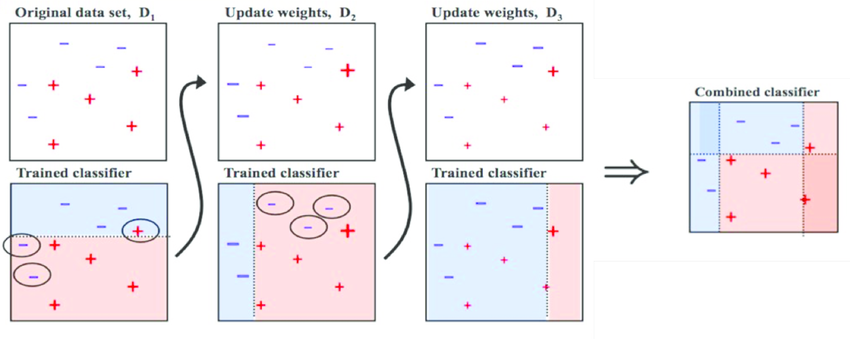

> **배깅은 병렬로 학습하는 반면, 부스팅은 순차적으로 학습합니다. 한번 학습이 끝난 후 결과에 따라 가중치를 부여합니다. 그렇게 부여된 가중치가 다음 모델의 결과 예측에 영향을 줍니다.**

> **오답에 대해서는 높은 가중치를 부여하고, 정답에 대해서는 낮은 가중치를 부여합니다. 따라서 오답을 정답으로 맞추기 위해 오답에 더 집중할 수 있게 되는 것입니다.**

> **부스팅은 배깅에 비해 error가 적습니다. 즉, 성능이 좋습니다. 하지만 속도가 느리고 오버 피팅이 될 가능성이 있습니다. 그렇다면 실제 사용할 때는 배깅과 부스팅 중 어떤 것을 선택해야 할까요? 상황에 따라 다르다고 할 수 있습니다. 개별 결정 트리의 낮은 성능이 문제라면 부스팅이 적합하고, 오버 피팅이 문제라면 배깅이 적합합니다.**

### **RandomForest** : 앙상블 학습의 대표적인 알고리즘
1. 각각의 트리를 훈련시키기 위한 data를 랜덤하게 생성 -> 입력한 훈련 data에서 랜덤하게 sample을 복원 추출하여 훈련 data를 만든다.
- bootstrap sample : 중복을 허용하여 random으로 뽑은 sample
- 훈련 set의 크기와 같은 size로 만듦
- 각 노드를 분할할 때, 전체 특성 중 일부 특성을 무작위로 고른 다음 이 중에서 최선의 분할을 찾음 => RandomForestClassifier : 전체 특성 개수의 제곱근만큼의 특성을 선택
- 모든 노드를 만들 때 이 과정을 반복
- 회귀 모델인 RandomForestRegressor : 전체 특성을 사용

2. 사이킷런의 random forest는 기본적으로 100개의 결정 트리를 이런 방식으로 훈련
- 분류 : 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측값으로 결정
- 회귀 : 단순히 각 트리의 예측값을 평균

=> 랜덤하게 선택한 샘플과 특성을 사용하기에, 훈련 세트에 과대적합되는 것을 방지, 검증 set와 테스트 set에서 안정적인 성능을 얻을 수 있음

```python
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)
# 교차 검증을 통해 훈련 score (Cross_Validate() 함수의 'train_score')와 validation score ('test_score')를 알아냄
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs = -1)
# K가 5일 때, train_score는 validation fold가 아닌 나머지 4개의 train_fold를 학습한 모델의 점수 => train_fold로 학습했다고 해서 모델이 해당 data set을 100% 설명하는 것이 아님
# test_score : validataion_fold로 모델을 평가한 점수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# cross_validate()로 나뉘어진 train과 validation set 각각이 RandomForest모델에 학습됨
```
- rf.oob_score_ : bootstrap sample 생성 과정에서 select되지 못한 OOB (out of bag) sample로 훈련한 decision tree 를 평가한 score


### **Extra Tree**
- bootstrap sample을 사용 x
- 노드를 분할 시, splitter 매개변수를 best가 아닌 random으로 설정한 것과 같이, 가장 좋은 분할이 아닌 무작위로 분할을 함
- 특성을 무작위로 분할하면 성능이 낮아지겠지만, 많은 트리를 앙상블하기 때문에 과대적합을 방지하고 검증 set의 점수를 높임
- random하게 노드를 분할하기에, 빠른 계산 속도가 장점

---

> **Gradient Descent** : https://angeloyeo.github.io/2020/08/16/gradient_descent.html

=> seta를 계속해서 수정해나가는 방식, 손실함수의 global minimum을 향해 점진적으로 내려가는 방식

## **Gradinet Boosting 그래디언트 부스팅**
-  결정 트리를 계속 추가하면서 손실함수의 가장 낮은 곳을 찾아 이동
- 깊이가 얕은 tree를 사용하여, 손실함수의 낮은 곳으로 천천히 조금씩 이동
- 학습률 매개변수로 속도를 조절

- 부스팅의 대표적인 모델은 AdaBoost, Gradient Boost등이 있음
- Gradient Boost의 변형 모델로는 XGBoost, LightGBM, CatBoost가 있음

#### **Ada Boost**
- 노드 하나에 두개의 리프(leaf)를 지닌 트리를 stump라고 함
- AdaBoost는 여러 개의 stump로 구성
- 여러 질문을 통해 데이터를 분류하는 트리와 다르게, stump는 단 하나의 질문으로 데이터를 분류해야하기에, stump는 약한 학습기(weak learner)
- 어떤 Stump는 다른 Stump보다 가중치가 높습니다. (Amount of Say가 큽니다.)
- 각 Stump의 error는 다음 Stump의 결과에 영향을 줍니다.

> 랜덤 포레스트는 여러 개의 트리의 결과를 합산해서 최종 결과를 낸다. 다수결의 원칙을 통해 결론을 내기에, 최종 분류를 하는데 있어 각각의 트리는 동등한 가중치를 가지고 있음.

> 하지만 AdaBoost에서는 특정 stump가 다른 stump보다 더 중요합니다. 즉, 더 가중치가 높습니다. 가중치가 높다는 것은 Amount of Say가 높다고 표현합니다. 결과에 미치는 영향이 크다는 뜻입니다.

- 처음에, 모든 stump들은 순서가 없음 -> 여러 stump들 중 가장 지니 불순도가 낮은 stump를 초기 stump로 설정

- 다음 stump로 넘어갈 때 sample의 가중치를 수정해서 전달, sample의 가중치와는 별도로 각각의 stump의 amount of say(가중치)가 있음 -> 해당 stump의 예측의 정확도를 바탕으로 매겨짐

- [에이다 부스트에 관한 자세한 설명](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-14-AdaBoost)

#### **Gradient Boost**
> Gradient Boost는 stump나 tree가 아닌 **하나의 leaf (single leaf)부터 시작합니다.** 이 leaf는 타겟 값에 대한 초기 추정 값을 나타냅니다. 보통은 초기 추정 값을 평균으로 정합니다. 그 다음은 AdaBoost와 동일하게 이전 tree의 error는 다음 tree에 영향을 줍니다. 하지만 AdaBoost와 다르게 stump가 아닌 tree로 구성되어 있습니다. 보통은 leaf가 8개에서 32개되는 tree로 구성합니다.

- Gradient boost regressor의 경우, 이전의 예측값과 실제값과의 잔차를 계산해서 이를 target으로 decision tree를 만들고, 이 decision tree가 예측한 잔차값을 학습률을 곱하여 원래 예측값에 더해서 값을 점점 실제 정답과 가까이 가도록 한다.

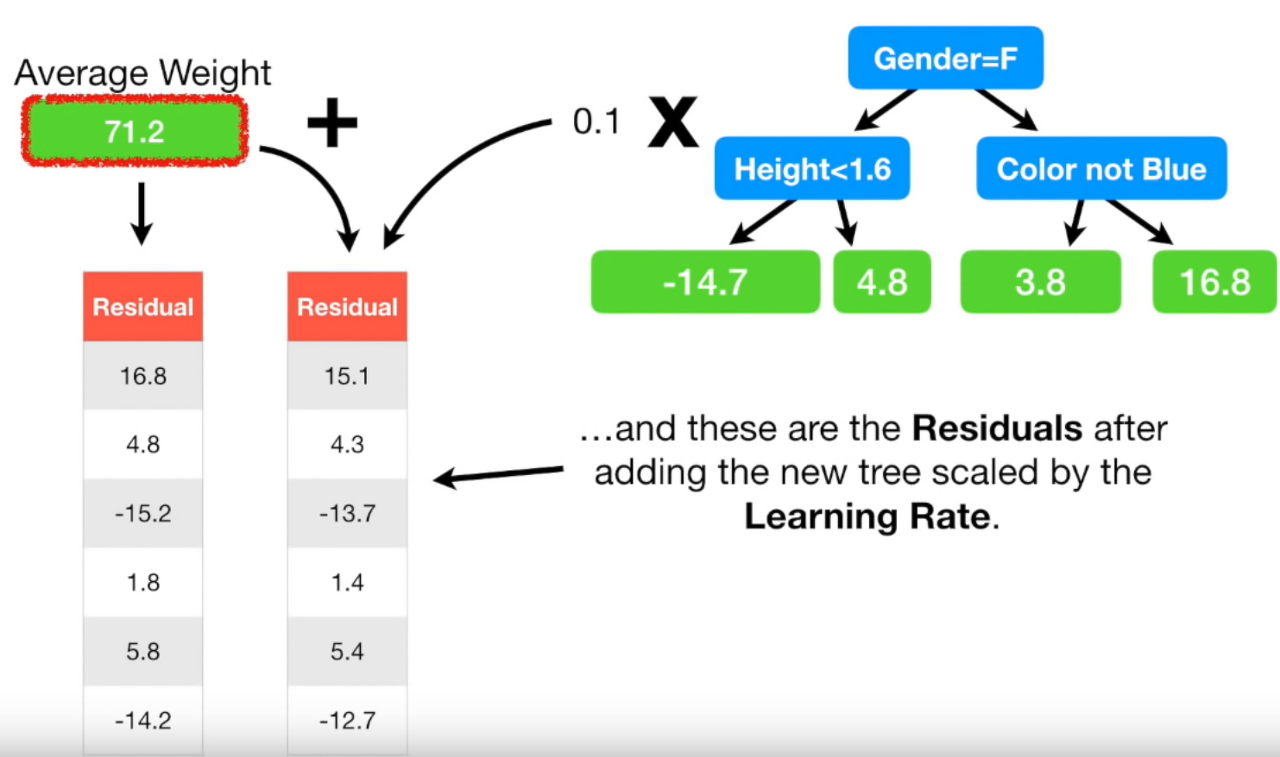

- 왼쪽이 처음 구한 Residual입니다. 이는 평균값인 71.2만 할용해서 구한 값입니다. 오른쪽이 결합된 모델로 구한 Residual입니다. 새로운 Residual은 초기 Residual보다 모두 작은 값입니다. Resiudal이 작아졌다는 뜻은 다른 말로 하면 실제 값과 예측 값의 차이가 작아졌다는 뜻입니다. 즉 조금씩 실제 값으로 다가가고 있다는 뜻입니다.

- 수정된 값을 다음 tree에 넘겨주면, 다음 tree는 새로운 잔차값을 예측해줌

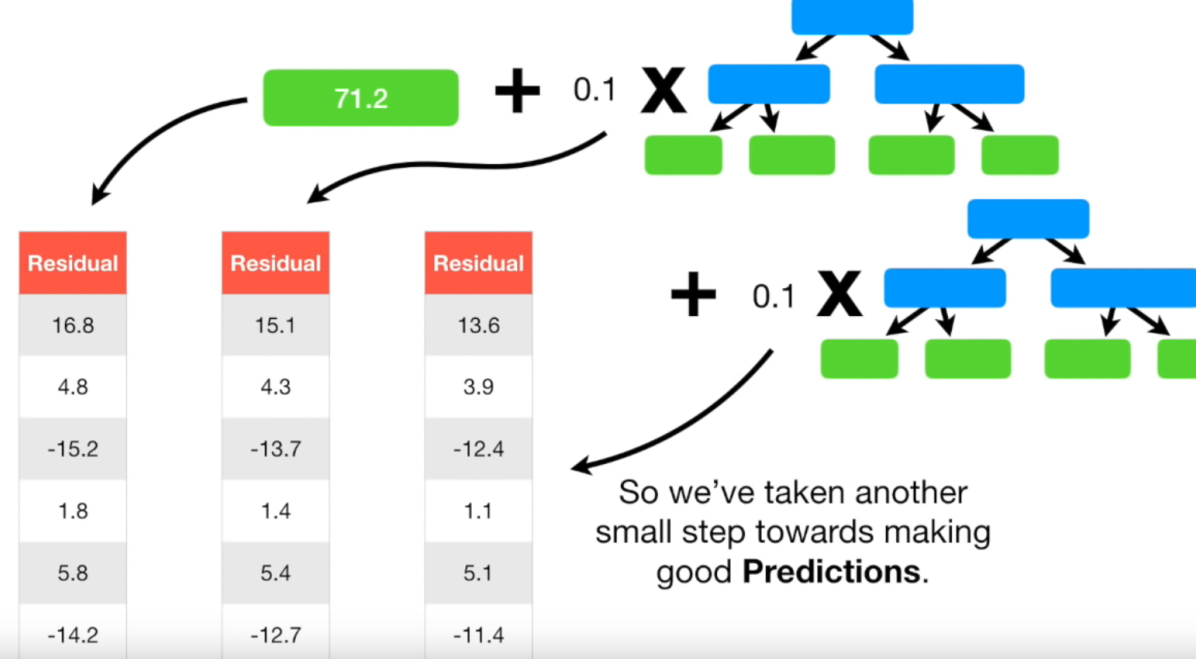

- Residual이 점차 감소하고 있습니다. iteration을 할수록 Resiual이 감소합니다. 즉, 예측 정확도가 더 높아진다는 뜻입니다.

- 이렇게 계속 반복합니다. 언제까지? 사전에 하이퍼 파라미터로 정해 놓은 iteration 횟수에 도달하거나 더 이상 residual이 작아지지 않을 때까지 반복을 합니다. 모든 반복이 완료되었다면 최종적으로 Gradient Boost 모델이 구축된 것입니다. 이제 새로운 데이터가 주어지면 본 모델로 몸무게를 예측할 수 있습니다.

[Gradient boost에 관한 자세한 설명](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost)

[Gradient boost 영어 강의](https://www.youtube.com/watch?v=3CC4N4z3GJc&t=52s)

-  Gradient Boost를 발전시킨 모델이 XGBoost, Light GBM, CatBoost

### Boosting을 하는 방식에도 2가지가 있다.

1. Ada Boost와 같이 중요한 data(일반적으로 모델이 틀리게 예측한 data)에 대해 weight를 주는 방식

2. GBDT(Gradient Boosting Decision Tree)와 같이 loss function 처럼 정답지와 오답지간의 차이를 반복적으로 training하는 방식 => gradient를 이용해서 모델을 개선하는 방식 (XGBOOST, Light GBM)

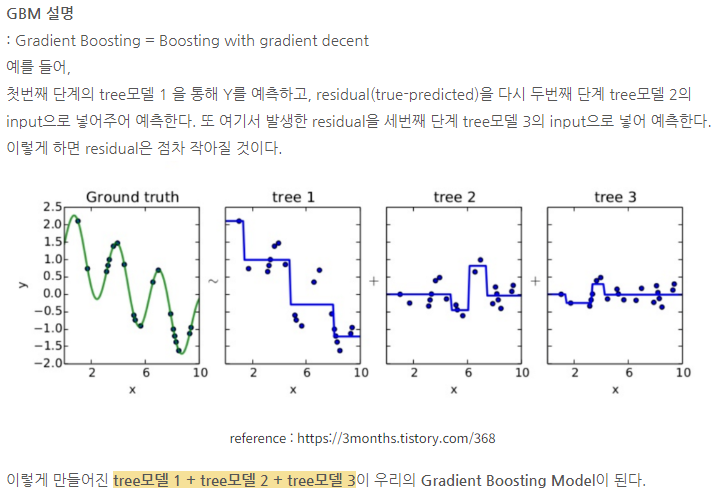

### **Light GBM LGBM**
#### Light GBM의 특징
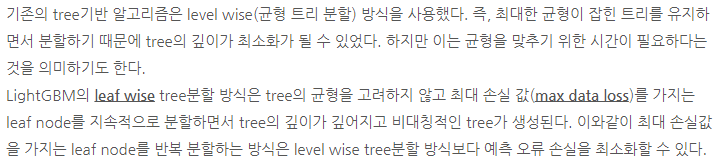

#### level wise 균형 트리 분할 방식 VS leaf wise tree 리프 중심 트리 분할 방식
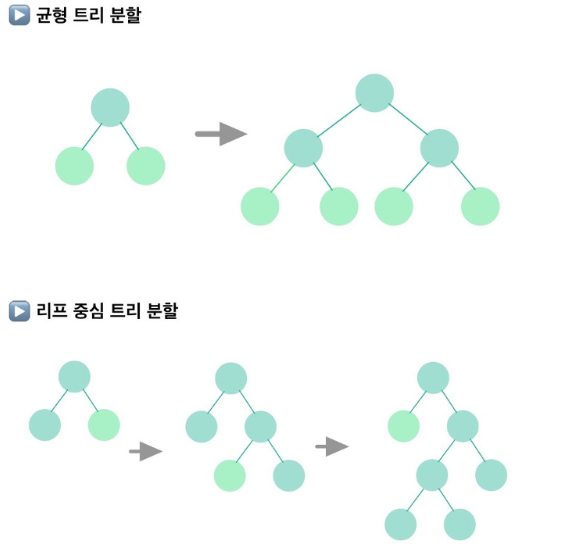

- 학습 시간이 적다, 빠른 속도
- 메모리 사용량이 상대적으로 적음
- categorical feature들의 자동 변환과 최적 분할
- GPU 학습 지원
- 적은 dataset을 사용할 경우 과적합 가능성이 크다 (10,000개 이하)

### **Ada Boost vs Gradient Boosting**
- AdaBoost에서는 weak learner로 stump (한 개 노드와 두 개의 가지를 갖는 매우 작은 decision tree) 를 사용
- 반면 Gradient Boosting에서는 restricted tree를 사용한다. restricted tree란, maximum number of leaves로 성장에 제한을 둔 decision tree
- 또한 Gradient Boosting의 첫 번째 weak learner는 모든 샘플의 output 평균을 값으로 갖는 하나의 leaf다.

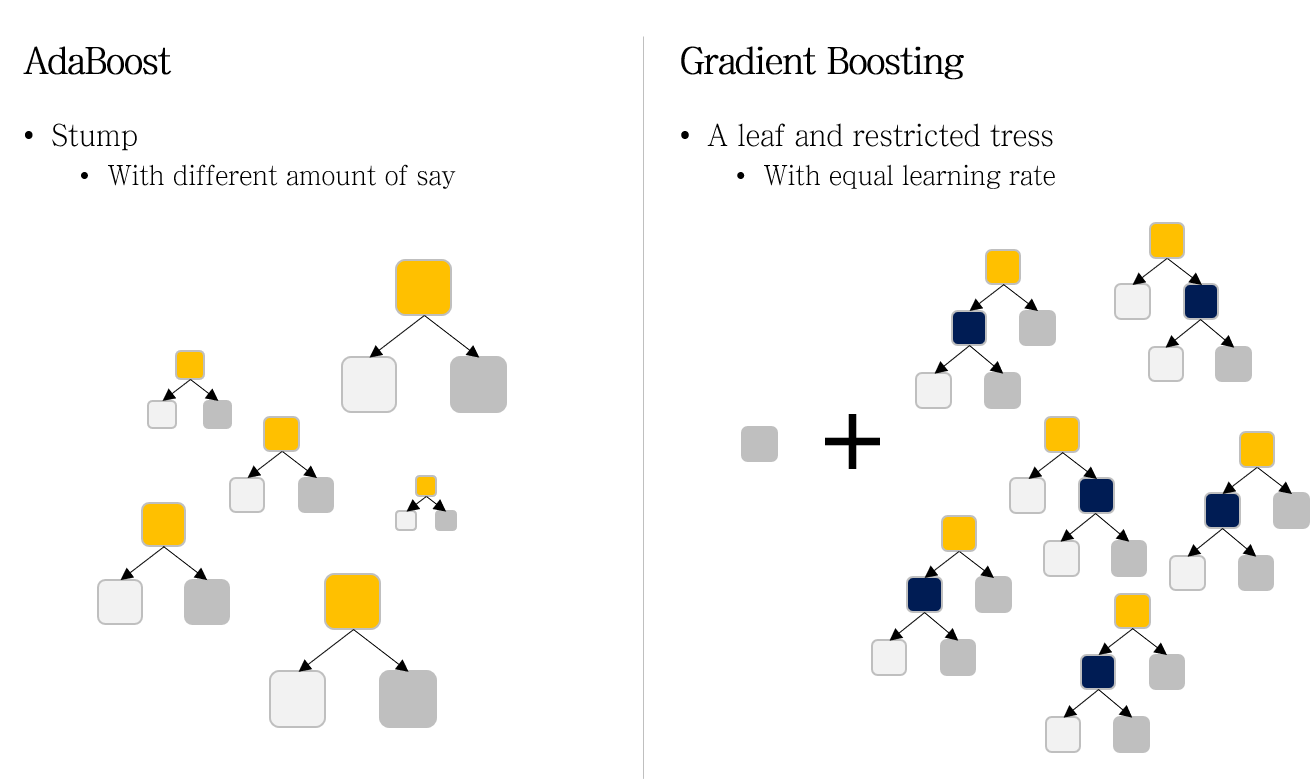

https://velog.io/@hyesoup/Gradient-Boost-GBM%EC%9D%B4%EB%9E%80

이 초기 single_leaf로부터 얻은 예측값은 실제 데이터의 분포를 잘 반영하지 않을 수 있습니다. 그러나 이 예측값과 실제 값 간의 잔차(오차)를 계산합니다.

잔차 계산과 다음 모델 : 다음 모델은 이 잔차에 초점을 맞춰 학습됩니다. 이때부터는 일반적인 결정 트리로서 데이터를 분할하고 예측을 수행합니다.

```python
# 데이터를 섞을 때 random_state를 고정해서 똑같은 작업을 재현할 수있음
# 그렇지 않으면 cross_val_score를 실행할 때마다 폴드가 바뀌어 매번 결과가 달라짐

kfold = KFold(n_splits=n, shuffle=True, random_state=0)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
```

### Histogram Based Gradient Boosting
- Pre-sorted 알고리즘의 경우 사전 정렬한 변수 값에 대해 가능한 모든 분할점을 나열함으로써 간단하게 최적의 분할점을 찾을 수 있지만, 효율적이지 못하다는 단점이 있다. Histogram-based 알고리즘은 연속적인 변수 값을 이산적인 구간(bin)으로 나누고, 이 구간을 사용하여 학습과정 속에서 피쳐 히스토그램을 구성한다.

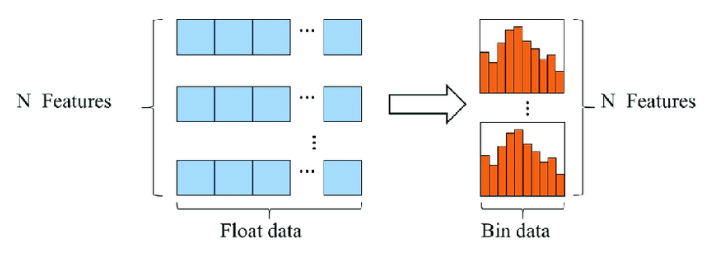

- **XGBoost, LightGBM : 히스토그램 기반 그레이디언트 부스팅 알고리즘**

https://wooono.tistory.com/328 : permutation importances

#### **n_repeats 매개변수**
- permutation_importance() 함수에서 n_repeats 매개변수는 특성을 섞는 과정을 몇 번 반복할지를 나타냅니다. Permutation Importance는 특정 특성을 랜덤하게 섞어서 모델의 예측에 미치는 영향을 측정하는 방법입니다. 이를 여러 번 반복하여 더욱 신뢰성 있는 결과를 얻기 위해 n_repeats를 사용합니다.

- 실제로 특성의 중요도를 계산하기 위해 permutation_importance()는 다음과 같은 과정을 수행합니다:

- 원본 데이터로 모델을 훈련하고 예측을 수행합니다.
각 특성에 대해 해당 특성의 값을 랜덤하게 섞습니다.
섞인 데이터로 모델을 사용하여 예측을 수행합니다.
섞인 데이터에서의 예측과 원본 데이터에서의 예측 간의 차이를 측정합니다.
이러한 과정을 n_repeats번 반복합니다.
n_repeats가 클수록 결과는 더욱 안정적이며 특성의 중요도를 더 정확하게 측정할 수 있습니다. 하지만 n_repeats가 증가하면 계산 비용이 증가할 수 있으므로 적절한 값으로 설정하는 것이 중요합니다. 일반적으로 10 이상의 값으로 시작하는 것이 권장됩니다.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 랜덤포레스트

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [ ]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 엑스트라트리

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## 그레이디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


## 히스토그램 기반 부스팅

In [ ]:
# 사이킷런 1.0 버전 아래에서는 다음 라인의 주석을 해제하고 실행하세요.
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [ ]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


#### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
